## Importing the data and various libraries

In [3]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import math
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle
import os
import random
import re
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

# defining a color pallette
palette = sns.color_palette("husl", 12)

# import all trasect files
folder_path = "/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files"
files = os.listdir(folder_path)
print(files)
# Filter files based a the pattern
relevant_files = [file for file in files if "w50_" in file and "_grids_species_richness.csv" in file]

# Import relevant files and store them as grid_dp
dfs = {} # create a disctionary to store my data
for file in relevant_files:
    # Extract dp from the file name
    dp = file.split("_")[1]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file))

    # Store the DataFrame with the name grid_dp
    dfs[dp] = df

    print(f"File '{file}' imported as '{dp}'")
    
print (list(dfs.keys()))
# Create a new dictionary with integer keys so that I can better plot
dfs_int_keys = {}
# Convert keys to integers and add them to the new dictionary
for dp, df in dfs.items():
    # Extract the integer part from the key
    dp_int = int(dp[:-2])  # Remove the last two characters ('dp') and convert to integer
    # Add the DataFrame to the new dictionary with the integer key
    dfs_int_keys[dp_int] = df

# Print the new dictionary keys
print(list(dfs_int_keys.keys()))

# Make sure we remove the transects that did not run until the end
for dp, df in dfs_int_keys.items():
    # Group the DataFrame by 'Simulation' and count the number of unique 'X coord' values
    cells = df.groupby('Simulation').apply(lambda group: group['X coord'].nunique())
    # Get the simulations that did not run until the end
    not_end = cells[cells <= 1].index
    # Remove the simulations that did not run until the end
    dfs_int_keys[dp] = df[~df['Simulation'].isin(not_end)]

    print(f"Number of complete simulations for d = {dp}: {len(dfs_int_keys[dp]['Simulation'].unique())}")


['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', '.DS_Store', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness.csv', 'w50_8dp_iterations_species_richness.csv', 'w50_3dp_grids_genetic_diversit

In [29]:
mean_transects = {} # Dictionary to store mean DataFrames for each dp

for i, key in enumerate(sorted(dfs_int_keys.keys())):
    #print(dfs_int_keys[key].head())
    
    dp = key
    mean_t = dfs_int_keys[key].groupby('X coord')['Species Richness'].mean().reset_index()
    mean_transects[dp] = mean_t
    
    print(f"Mean calculated for 'd = {dp}'")
    print(mean_transects[key].head())
    
# the folowing will help me plot multiple gray line behind the main line
mean_transects_100 = {} # Dictionary to store mean DataFrames for each dp and each Y direction too

for i, key in enumerate(sorted(dfs_int_keys.keys())):
    #print(dfs_int_keys[key].head())
    
    dp = key
    mean_t_100 = dfs_int_keys[key].groupby(["Y coord", 'X coord'])['Species Richness'].mean().reset_index()
    mean_transects_100[dp] = mean_t_100
    
    print(mean_transects_100[key].head())

Mean calculated for 'd = 3'
   X coord  Species Richness
0        0          1.112163
1        1          1.110578
2        2          1.109047
3        3          1.107440
4        4          1.104081
Mean calculated for 'd = 4'
   X coord  Species Richness
0        0          1.174729
1        1          1.171142
2        2          1.166725
3        3          1.162305
4        4          1.155281
Mean calculated for 'd = 6'
   X coord  Species Richness
0        0          1.221463
1        1          1.217828
2        2          1.212575
3        3          1.207311
4        4          1.196258
Mean calculated for 'd = 8'
   X coord  Species Richness
0        0          1.199723
1        1          1.197395
2        2          1.193213
3        3          1.186423
4        4          1.178132
Mean calculated for 'd = 10'
   X coord  Species Richness
0        0          1.206693
1        1          1.199231
2        2          1.195193
3        3          1.191734
4        4        

## Distribution


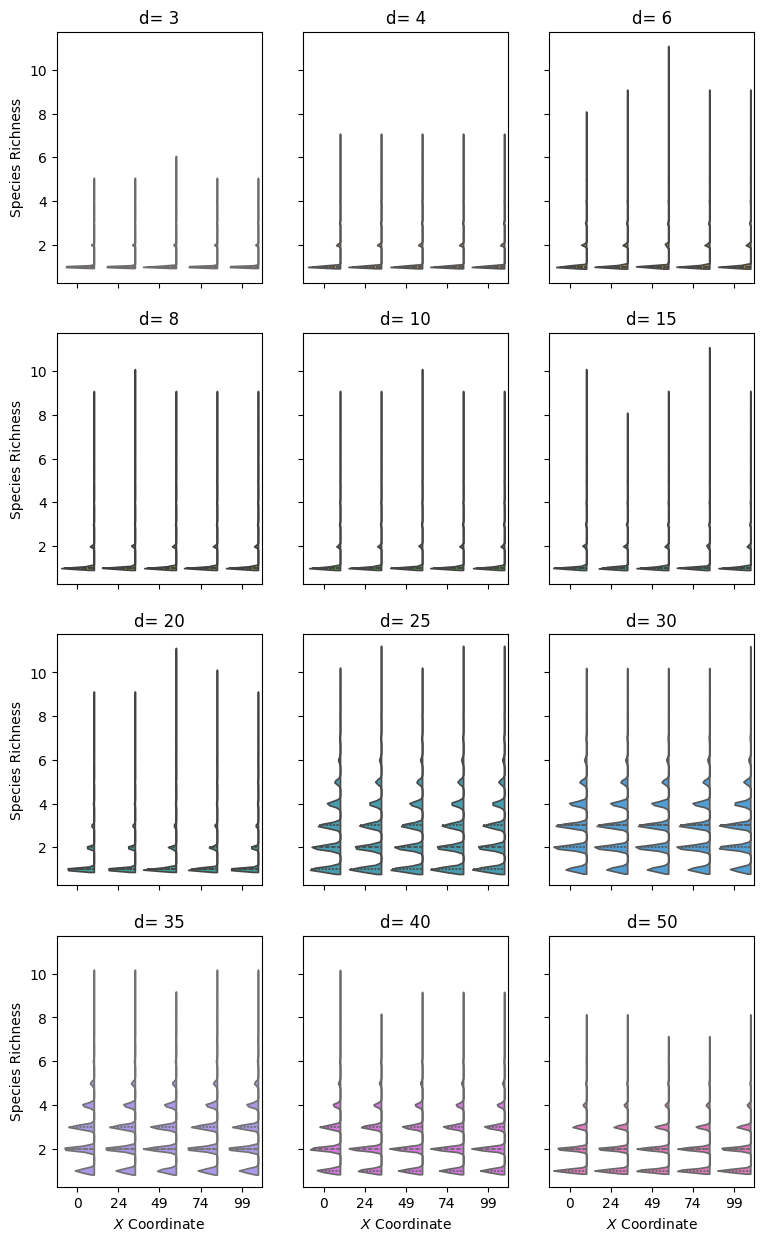

In [23]:
# Calculate the distribution of specier richness at different x coordinates
# Create a dictionary to store the distributions
species_dists = {}

# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 15), sharex=True, sharey=True)


# Loop through the keys and dataframes and select only dataframes with x = 0, 24, 49, 74, 99
for i, key in enumerate(sorted(dfs_int_keys.keys())):
    df = dfs_int_keys[key]
    filtered_df = df[df['X coord'].isin([0, 24, 49, 74, 99])]
    
    row = (i) // 3
    col = (i) % 3
    df = dfs_int_keys[key]
    
    # sns.stripplot(data=filtered_df, x='X coord', y='Species Richness', jitter=True, size=3)
    sns.violinplot(data=filtered_df, x='X coord', y='Species Richness', split=True, inner="quart", ax=axs[row, col], color=palette[i]) 

    axs[row, col].set_title(f"d= {key}") 

axs[3, 0].set_xlabel('$X$ Coordinate')
axs[3, 1].set_xlabel('$X$ Coordinate')
axs[3, 2].set_xlabel('$X$ Coordinate')

plt.show()

# save the figure
# fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/First CEE submissions/Extra figures outside submissions/species_richness_violin_plots_x_coords.png', dpi=300)

### Table to store all for each different position on x-axis = [0, 24, 49, 74, 99]

In [ ]:
# Create an empty list to store the statistics
stats_list = []

# Loop through the keys and dataframes
for key, df in dfs_int_keys.items():
    # # Convert 'X coord' to categorical
    # df['X coord'] = df['X coord'].astype('category')
    
    # Filter only the required X coordinates
    filtered_df = df[df['X coord'].isin([0, 24, 49, 74, 99])]
    
    # Get the unique X coordinates
    coords = sorted(filtered_df['X coord'].unique())  # Ensure sorted order
    
    # Calculate and store mean, std, variance for each X coord
    for coord in coords:
        subset = filtered_df[filtered_df['X coord'] == coord]["Species Richness"]

        if not subset.empty:
            mean = subset.mean()
            std = subset.std()
            var = subset.var()

            # Append the statistics for this key and coord to the list
            stats_list.append({
                'd': key,
                'X coord': coord,
                'Mean': mean,
                'Std Dev': std,
                'Variance': var
            })

# Create a DataFrame from the statistics list
stats_df = pd.DataFrame(stats_list)

# Display the summary table
stats_df

# stats_df.to_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/First CEE submissions/Extra figures outside submissions/species_richness_stats_x_coords.csv', index=False)


### Table to store the stats only at position x=49

In [8]:
stats_df_x49 = stats_df[stats_df['X coord'] == 49]
stats_df_x49 = stats_df_x49.sort_values(by='d', ascending=True)

stats_df_x49

,d,X coord,Mean,Std Dev,Variance
12,3,49,1.111062,0.382280,0.146138
47,4,49,1.175292,0.487256,0.237418
42,6,49,1.219468,0.567228,0.321748
37,8,49,1.204805,0.572569,0.327835
57,10,49,1.205793,0.584739,0.341919
52,15,49,1.209993,0.589272,0.347242
2,20,49,1.376440,0.753210,0.567325
22,25,49,2.416518,1.344764,1.808389
27,30,49,2.662126,1.256442,1.578646
7,35,49,2.498625,1.146249,1.313886


## Plots of average transects


In [25]:

# derivative of the environment function
wavelength = 50
devsin = (255 * np.pi * abs(np.cos(2 * np.pi * (np.arange(0, 100 , 1) / wavelength)))) / wavelength  # derivative of the environment function

# adding the devsin as part of the dataframe:
# Loop through the keys and dataframes
for i, key in enumerate(sorted(dfs_int_keys.keys())):
    row = (i) // 3
    col = (i) % 3
    df = dfs_int_keys[key]
    df.loc[:, "devsin"] = df["X coord"].map(lambda x: devsin[x])
    print(f"d = {key}'", df.head())


d = 3'    Unnamed: 0  X coord  Y coord  Species Richness  \
0           0        0        0                 1   
1           1        1        0                 1   
2           2        2        0                 1   
3           3        3        0                 1   
4           4        4        0                 1   

                                       Simulation  dp     devsin  
0  REvoSim_individuals_data_envw50_3dp_aj2301.txt   3  16.022123  
1  REvoSim_individuals_data_envw50_3dp_aj2301.txt   3  15.895783  
2  REvoSim_individuals_data_envw50_3dp_aj2301.txt   3  15.518758  
3  REvoSim_individuals_data_envw50_3dp_aj2301.txt   3  14.896993  
4  REvoSim_individuals_data_envw50_3dp_aj2301.txt   3  14.040293  
d = 4'    Unnamed: 0  X coord  Y coord  Species Richness  \
0           0        0        0                 1   
1           1        1        0                 1   
2           2        2        0                 1   
3           3        3        0                 1   


### Plots with percentile intervall and all simulations

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_79397/98111801.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2769) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='X coord', y='Species Richness', hue='Simulation', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_79397/98111801.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2846) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='X coord', y='Species Richness', hue='Simulation', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_79397/98111801.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2878) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='X co

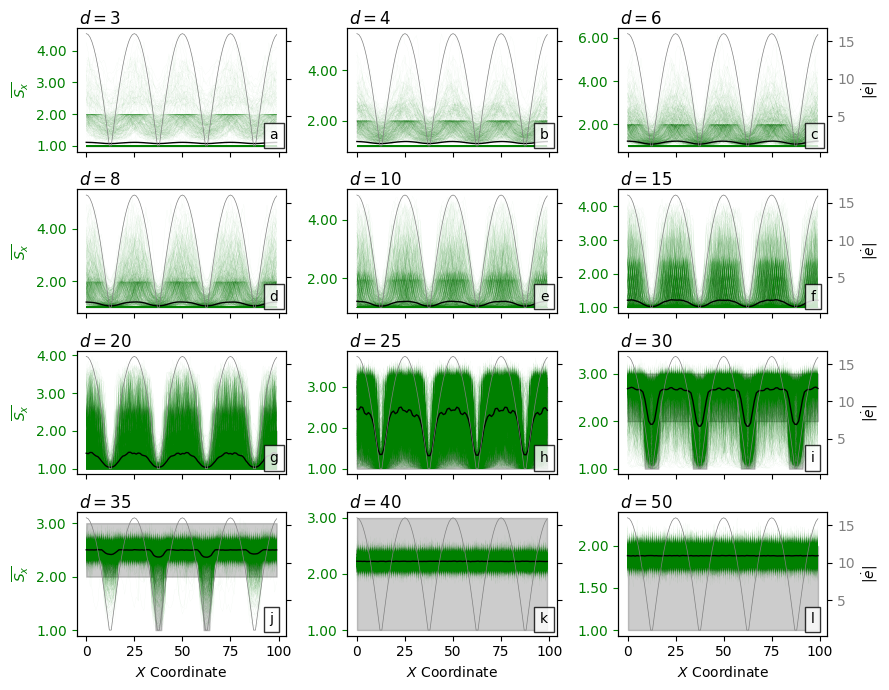

In [26]:
greens = ['green']
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 7), sharex=True)  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(dfs_int_keys.keys())):
    row = (i) // 3
    col = (i) % 3
    df = dfs_int_keys[key]
    
    sns.lineplot(data=df, x='X coord', y='Species Richness', hue='Simulation', palette=greens, errorbar=None, ax=axs[row, col], legend=False, alpha=0.1, linewidth = 0.1)
    sns.lineplot(data=df, x='X coord', y='Species Richness', color='black', ax=axs[row, col], linewidth = 1, errorbar=('pi', 50))
    
   
    axs[row, col].text(0.01, 1, f'$d={key}$', transform=axs[row, col].transAxes, fontsize=12, verticalalignment='bottom', color='black')
    axs[row, col].annotate(letter[i], xy=(0.92, 0.10), xycoords='axes fraction', fontsize=10, color='black', bbox=dict(edgecolor='black', facecolor='white', alpha =0.8))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # Plotting devsin on secondary y-axis
    ax2 = axs[row, col].twinx()
    sns.lineplot(data=df, x='X coord', y='devsin', color='gray', errorbar=None, ax=ax2, linewidth = 0.5)
    
    if key in [6, 15 , 30, 50]:
        ax2.set_ylabel('${|\\dot{e}|}$')
        ax2.tick_params(axis='y', labelcolor='gray')
    else:
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
   
        
for ax in axs.flat:
    ax.set_ylabel('${\\overline{S_x}}$', color='green')
    ax.tick_params(axis='y', colors='green')
        


axs[3, 0].set_xlabel('$X$ Coordinate')
axs[3, 1].set_xlabel('$X$ Coordinate')
axs[3, 2].set_xlabel('$X$ Coordinate')

axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')
axs[2, 1].set_ylabel('')
axs[3, 1].set_ylabel('')
axs[0, 2].set_ylabel('')
axs[1, 2].set_ylabel('')
axs[2, 2].set_ylabel('')
axs[3, 2].set_ylabel('')


plt.tight_layout()  
plt.show()

fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/First CEE submissions/Extra figures outside submissions/Interquartile_range_x_coords.png', dpi=300)

### Plots with percentile interval only, and mean

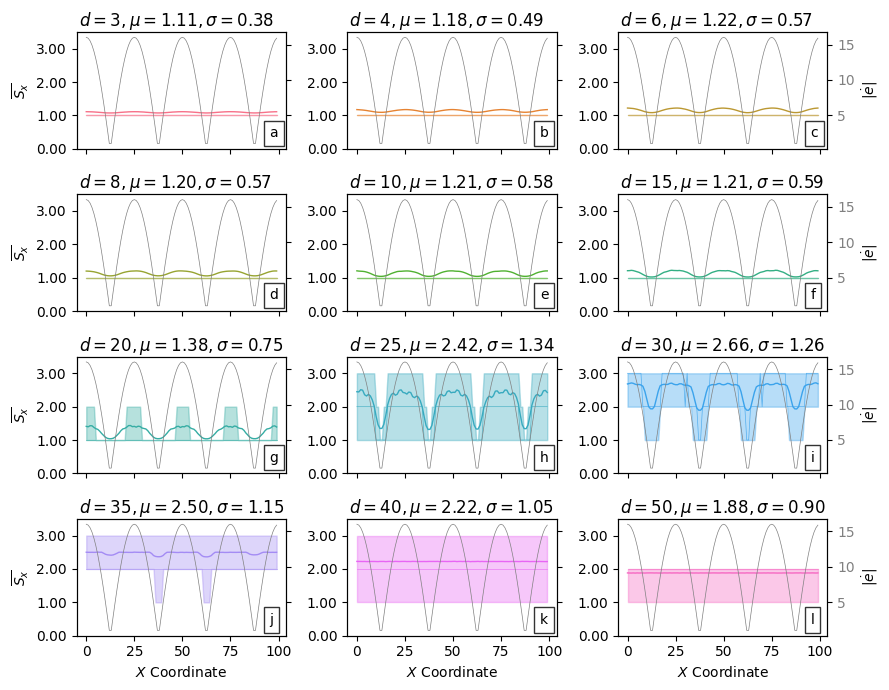

In [28]:
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 7), sharex=True)  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(dfs_int_keys.keys())):
    row = (i) // 3
    col = (i) % 3
    df = dfs_int_keys[key]
    
    
    sns.lineplot(data=df, x='X coord', y='Species Richness', color=palette[i], ax=axs[row, col], linewidth = 1, errorbar=('pi', 50))
    sns.lineplot(data=df, x='X coord', y='Species Richness', color=palette[i], ax=axs[row, col], linewidth = 0.5, estimator='median', errorbar=('pi', 50), alpha = 0.8)

    axs[row, col].text(0.01, 1, f"$d={key}, \mu={stats_df_x49['Mean'].iloc[i]:.2f} ,\sigma={stats_df_x49['Std Dev'].iloc[i]:.2f}$", transform=axs[row, col].transAxes, fontsize=12, verticalalignment='bottom', color='black')
    axs[row, col].annotate(letter[i], xy=(0.92, 0.10), xycoords='axes fraction', fontsize=10, color='black', bbox=dict(edgecolor='black', facecolor='white', alpha =0.8))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axs[row, col].set_ylim(0, 3.5)
    
    # Plotting devsin on secondary y-axis
    ax2 = axs[row, col].twinx()
    sns.lineplot(x=np.arange(0, 100 , 1), y=devsin, color='gray', errorbar=None, ax=ax2, linewidth = 0.5)
    
    if key in [6, 15 , 30, 50]:
        ax2.set_ylabel('${|\\dot{e}|}$')
        ax2.tick_params(axis='y', labelcolor='gray')
    else:
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
   
        
for ax in axs.flat:
    ax.set_ylabel('${\\overline{S_x}}$', color='black')
    ax.tick_params(axis='y', colors='black')
        


axs[3, 0].set_xlabel('$X$ Coordinate')
axs[3, 1].set_xlabel('$X$ Coordinate')
axs[3, 2].set_xlabel('$X$ Coordinate')

axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')
axs[2, 1].set_ylabel('')
axs[3, 1].set_ylabel('')
axs[0, 2].set_ylabel('')
axs[1, 2].set_ylabel('')
axs[2, 2].set_ylabel('')
axs[3, 2].set_ylabel('')


plt.tight_layout()  
plt.show()


### Heatplot

In [71]:
dfs_int_keys[6].head()

,Unnamed: 0,X coord,Y coord,Species Richness,Simulation,dp,devsin
0,0,0,0,1,REvoSim_individuals_data_envw50_6dp_aj127.txt,6,16.022123
1,1,1,0,1,REvoSim_individuals_data_envw50_6dp_aj127.txt,6,15.895783
2,2,2,0,1,REvoSim_individuals_data_envw50_6dp_aj127.txt,6,15.518758
3,3,3,0,1,REvoSim_individuals_data_envw50_6dp_aj127.txt,6,14.896993
4,4,4,0,1,REvoSim_individuals_data_envw50_6dp_aj127.txt,6,14.040293


In [74]:
pivot_heatmaps = {}

for i, key in enumerate(sorted(dfs_int_keys.keys())):
    
    dp = key
    pivot = dfs_int_keys[key].pivot_table(index="Species Richness", columns="X coord", aggfunc="size", fill_value=0)
    pivot_heatmaps[dp] = pivot
    
    print(f"pivot calculated for 'd = {dp}'")

pivot calculated for 'd = 3'
pivot calculated for 'd = 4'
pivot calculated for 'd = 6'
pivot calculated for 'd = 8'
pivot calculated for 'd = 10'
pivot calculated for 'd = 15'
pivot calculated for 'd = 20'
pivot calculated for 'd = 25'
pivot calculated for 'd = 30'
pivot calculated for 'd = 35'
pivot calculated for 'd = 40'
pivot calculated for 'd = 50'


In [79]:
pivot_heatmaps[6].head()

X coord,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Species Richness,,,,,,,,,,,,,,,,,,,,,
1,240084,240644,241769,242927,244704,246772,249571,252544,256138,259964,...,262353,259472,255719,252236,249234,246442,244315,242344,241277,240413
2,36253,35994,35276,34160,33171,31900,30334,28622,26406,23820,...,22286,24120,26638,28819,30452,32144,33342,34665,35231,35773
3,8085,7949,7602,7670,7329,6988,6279,5336,4379,3490,...,2784,3582,4481,5259,6151,7040,7579,7784,8096,8268
4,2415,2296,2214,2226,1914,1688,1291,1076,765,471,...,335,530,787,1186,1543,1599,1858,2104,2278,2415
5,779,711,689,643,529,384,283,173,90,48,...,36,80,149,249,343,460,544,641,707,714


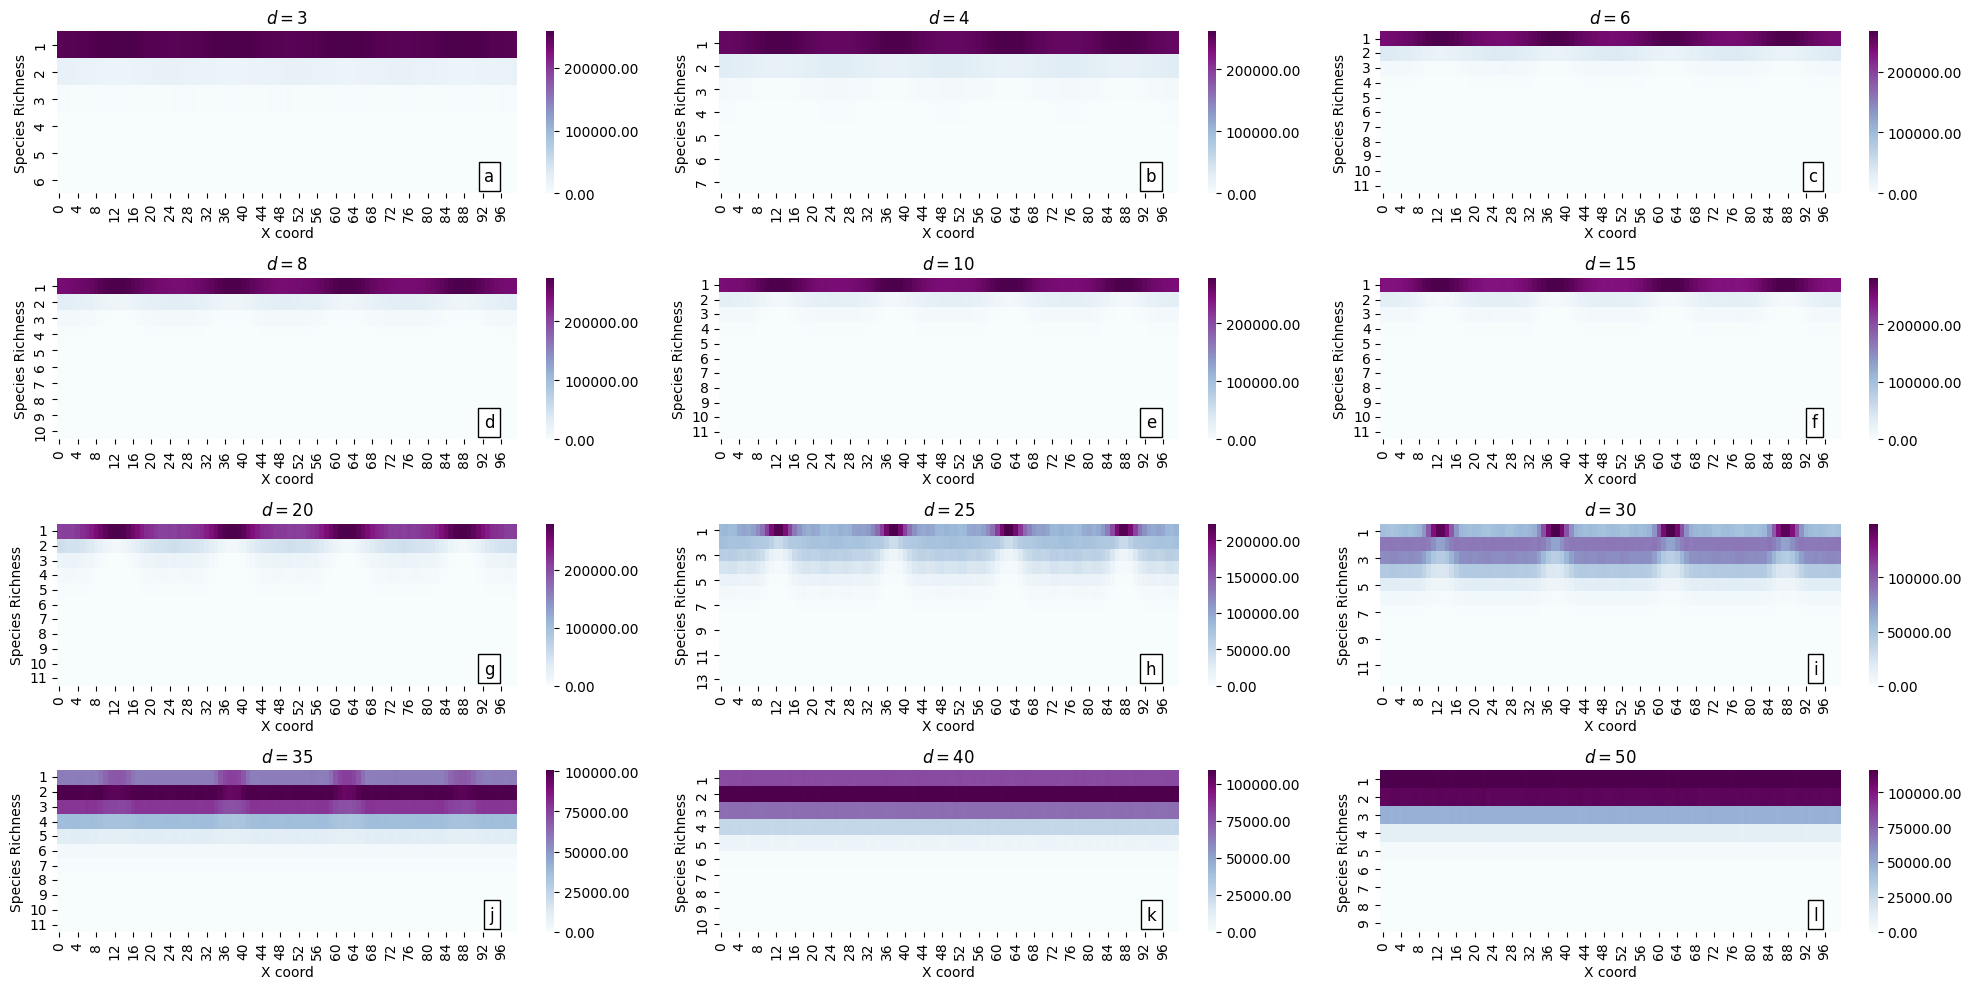

In [78]:
import string

# Define the size of the grid based on the number of heatmaps
num_heatmaps = len(pivot_heatmaps)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_heatmaps + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot each heatmap with label
for i, (dp, pivot) in enumerate(pivot_heatmaps.items()):
    row = i // num_cols
    col = i % num_cols
    sns.heatmap(pivot, cmap='BuPu', ax=axes[row, col], cbar_kws=dict(format='%.2f'))
    axes[row, col].set_title(f'$d = {dp}$')
    # axes[row, col].axis('off') 
    
    # Add labels with letters
    axes[row, col].text(0.95, 0.05, string.ascii_lowercase[i], 
                        fontsize=12, 
                        color='black',
                        ha='right',
                        va='bottom', 
                        transform=axes[row, col].transAxes,
                        bbox=dict(facecolor='white', alpha=1, edgecolor='black'))


# Adjust layout
plt.tight_layout()
plt.show()

## Poisson distributions

In [48]:
from scipy.stats import poisson

# mean at x=50 per d = 35
mean_50_6 = mean_transects[6][mean_transects[6]['X coord'] == 50]['Species Richness'].values[0]
lambda_pois =  mean_50_6 #This value means that on average at position x I get this number of species
k = 2 # this is the number of species I want to calculate the probability for

# Calculate the PMF
pmf = poisson.pmf(k, lambda_pois)
print(f"Probability of observing {k} species at x=50 for d=6: {pmf:.4f}")

Probability of observing 2 species at x=50 for d=6: 0.2196


Now I calculate the probability of 2 species occuring at ech x location for all d values

In [99]:
pmf_dict = {}
k=4

for key, df in dfs_int_keys.items():
    pmf_list = []  

    # Loop through unique X coordinates 
    for x in df['X coord'].unique():
        # Get lambda 
        lambda_pois = mean_transects[key].loc[mean_transects[key]['X coord'] == x, 'Species Richness'].values[0]

        # Calculate the PMF for the observed k
        pmf_value = poisson.pmf(k, lambda_pois)

        # Append result to list
        pmf_list.append({'X coord': x, 'k': k, 'lambda': lambda_pois, 'pmf': pmf_value})

    # Convert the list to a DataFrame and store it in the dictionary
    pmf_dict[key] = pd.DataFrame(pmf_list)


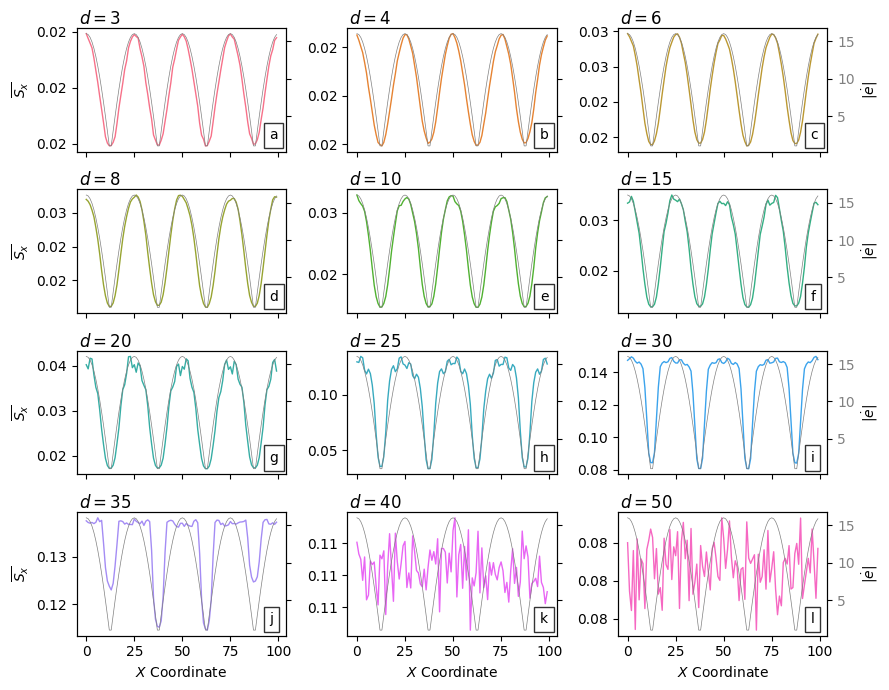

In [101]:
# plot the probability of observing 4 species all d

letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 7), sharex=True)  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(pmf_dict.keys())):

    row = (i) // 3
    col = (i) % 3
    df = pmf_dict[key]
    
    sns.lineplot(data=df, x='X coord', y='pmf', color=palette[i], ax=axs[row, col], linewidth = 1, errorbar=('pi', 50))
    # sns.lineplot(data=df, x='X coord', y='lambda', color=palette[i], ax=axs[row, col], linewidth = 0.5, errorbar=('pi', 50))

    axs[row, col].text(0.01, 1, f"$d={key}$", transform=axs[row, col].transAxes, fontsize=12, verticalalignment='bottom', color='black')
    axs[row, col].annotate(letter[i], xy=(0.92, 0.10), xycoords='axes fraction', fontsize=10, color='black', bbox=dict(edgecolor='black', facecolor='white', alpha =0.8))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


    
    # Plotting devsin on secondary y-axis
    ax2 = axs[row, col].twinx()
    sns.lineplot(x=np.arange(0, 100 , 1), y=devsin, color='gray', errorbar=None, ax=ax2, linewidth = 0.5)
    
    if key in [6, 15 , 30, 50]:
        ax2.set_ylabel('${|\\dot{e}|}$')
        ax2.tick_params(axis='y', labelcolor='gray')
    else:
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
   
        
for ax in axs.flat:
    ax.set_ylabel('${\\overline{S_x}}$', color='black')
    ax.tick_params(axis='y', colors='black')
        


axs[3, 0].set_xlabel('$X$ Coordinate')
axs[3, 1].set_xlabel('$X$ Coordinate')
axs[3, 2].set_xlabel('$X$ Coordinate')

axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')
axs[2, 1].set_ylabel('')
axs[3, 1].set_ylabel('')
axs[0, 2].set_ylabel('')
axs[1, 2].set_ylabel('')
axs[2, 2].set_ylabel('')
axs[3, 2].set_ylabel('')


plt.tight_layout()  
plt.show()

fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/First CEE submissions/Extra figures outside submissions/Prob_to-get-4_species_each-x_coords.png', dpi=300)


I would like now to plot the propabilities for k = [1, 2 ... 13] and then plot them as a heatmap

In [91]:
pmf_dict_pivot = {}

for key, df in dfs_int_keys.items():
    pmf_table = []  
    
    # Loop through X coord
    for x in df['X coord'].unique():
        # Get lambda
        lambda_pois = mean_transects[key].loc[mean_transects[key]['X coord'] == x, 'Species Richness'].values[0]
        
        # Compute PMF values for k = 1 to 13
        pmf_values = [poisson.pmf(k, lambda_pois) for k in range(1, 14)]
        
        # Store row with X coord and PMF values
        pmf_table.append([x] + pmf_values)
    
    # Convert to DataFrame with column names
    col_names = ['X coord'] + [str(k) for k in range(1, 14)]
    pmf_dict_pivot[key] = pd.DataFrame(pmf_table, columns=col_names)



# example of structure
pmf_dict_pivot.keys()



dict_keys([20, 35, 3, 50, 25, 30, 40, 8, 6, 4, 15, 10])

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_79397/249759596.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


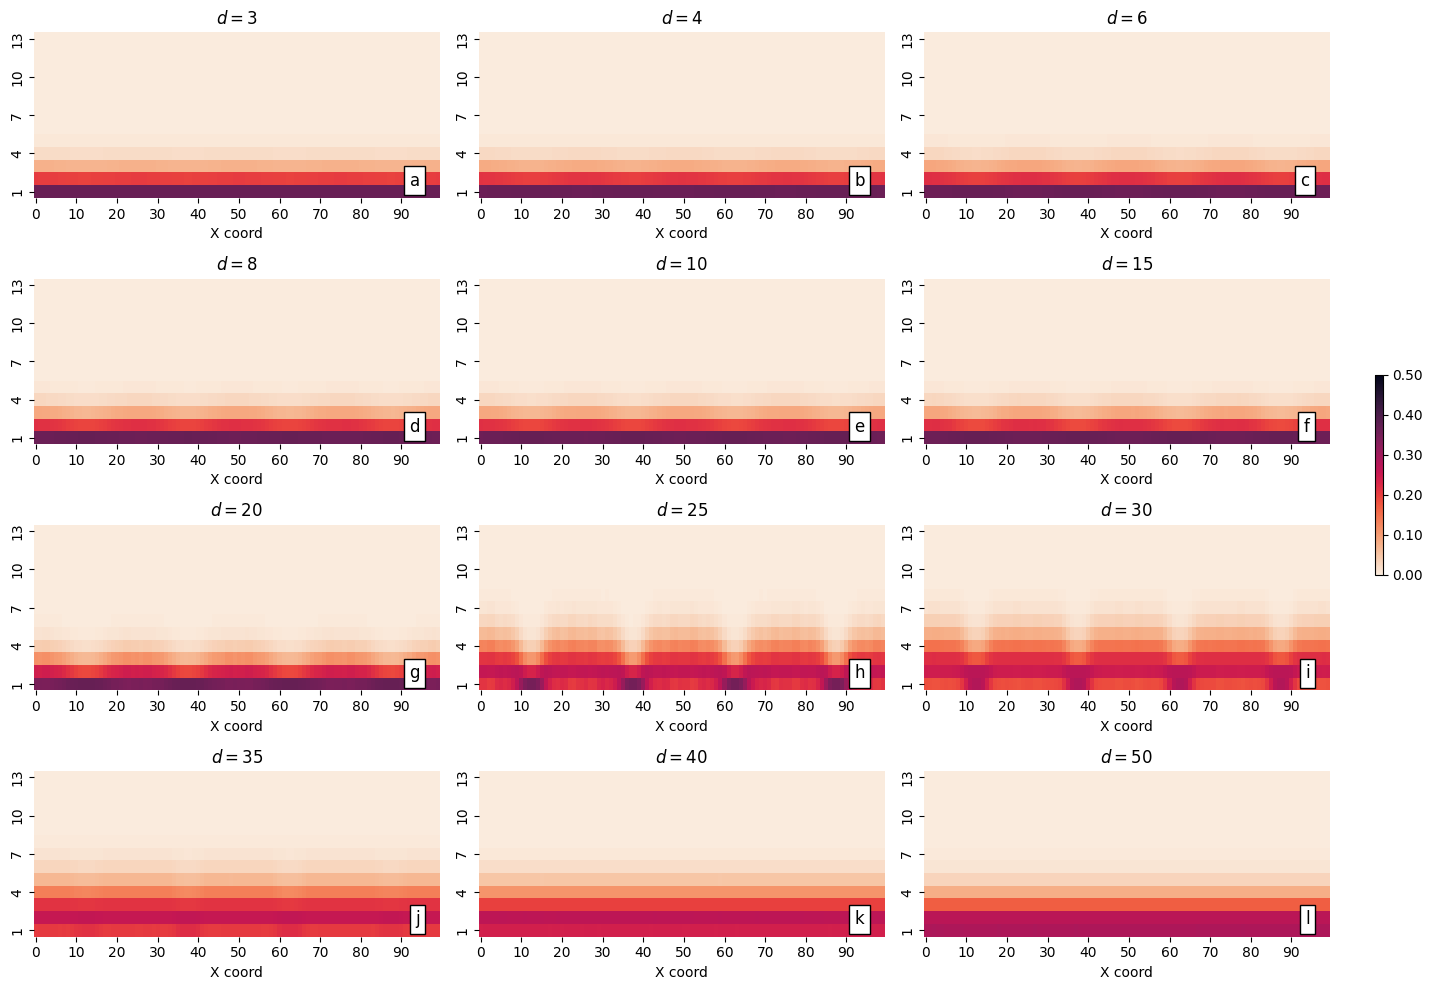

In [122]:
# Define the size of the grid based on the number of heatmaps
num_heatmaps = len(pmf_dict_pivot)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_heatmaps + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot each heatmap with label
for i, key in enumerate(sorted(pmf_dict_pivot.keys())):
    row = i // num_cols
    col = i % num_cols
    pivot = pmf_dict_pivot[key].set_index("X coord").T
    
    
    sns.heatmap(pivot, cmap='rocket_r', ax=axes[row, col], cbar_kws=dict(format='%.2f'), vmin=0, vmax=0.5, cbar=False, xticklabels=10, yticklabels=3)
    # Flip the y-axis (invert the order)
    axes[row, col].invert_yaxis()

    axes[row, col].set_title(f'$d = {key}$')
    # axes[row, col].axis('off') 
    
    # Add labels with letters
    axes[row, col].text(0.95, 0.05, string.ascii_lowercase[i], 
                        fontsize=12, 
                        color='black',
                        ha='right',
                        va='bottom', 
                        transform=axes[row, col].transAxes,
                        bbox=dict(facecolor='white', alpha=1, edgecolor='black'))

# Add a single colorbar for the entire figure (outside the subplots)
cbar_ax = fig.add_axes([0.92, 0.42, 0.005, 0.2])  # Adjust position as needed
norm = plt.Normalize(vmin=0, vmax=0.5)
sm = plt.cm.ScalarMappable(cmap='rocket_r', norm=norm)
sm.set_array([])  # Create a dummy array for colorbar
fig.colorbar(sm, cax=cbar_ax, format='%.2f')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/First CEE submissions/Extra figures outside submissions/Prob_to-get-1-13_species_each-x_coords.png', dpi=300)

## Plots of correlation with derivative

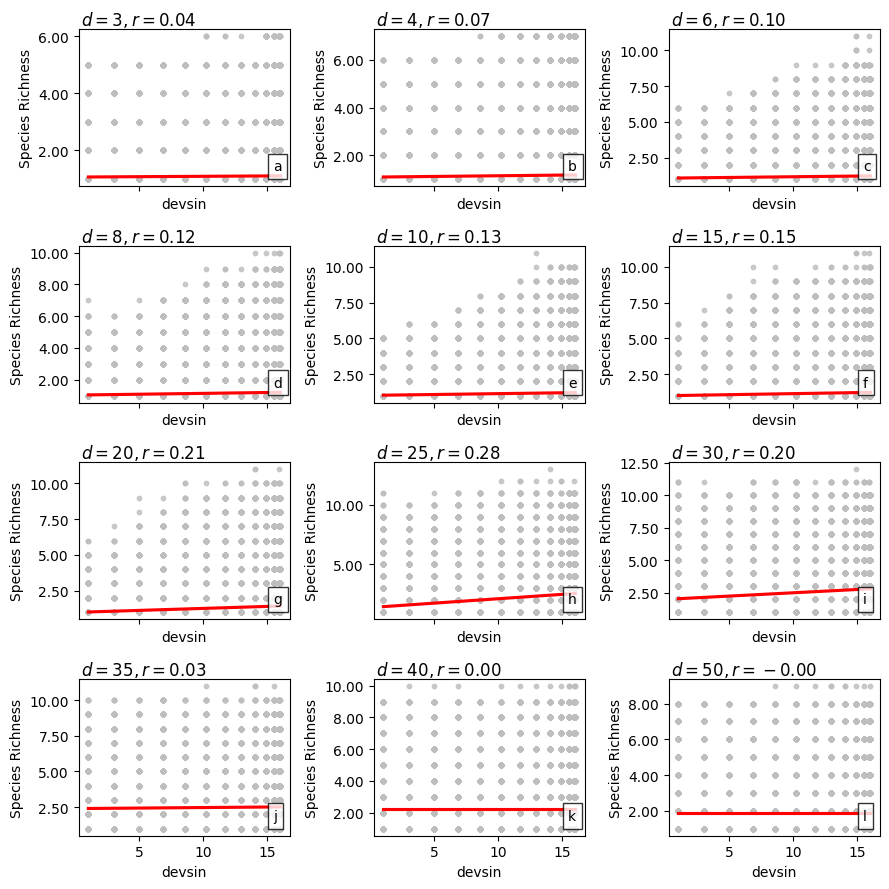

In [23]:
# Creating the figures and subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 9), sharex=True)  

# Loop through the keys and dataframes
for i, key in enumerate(sorted(dfs_int_keys.keys())):
    row = (i) // 3
    col = (i) % 3
    df = dfs_int_keys[key]
    
    x = df["devsin"]  # Normalized derivative (x-axis)
    y = df['Species Richness']  # Species richness (y-axis)


    # Compute Pearson correlation coefficient and r
    r, _ = stats.pearsonr(x, y)
    # Scatter plot with regression line (no confidence interval)
    sns.regplot(x=x, y=y, ax=axs[row, col], scatter_kws={'s': 10}, line_kws={'color': 'red'}, ci=None, color='#bebebe')

   
    axs[row, col].text(0.01, 1, f'$d={key}, r= {r:.2f}$', transform=axs[row, col].transAxes, fontsize=12, verticalalignment='bottom', color='black')
    axs[row, col].annotate(letter[i], xy=(0.92, 0.10), xycoords='axes fraction', fontsize=10, color='black', bbox=dict(edgecolor='black', facecolor='white', alpha =0.8))
    axs[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  
   
        
# for ax in axs.flat:
#     ax.set_ylabel('${\\overline{S_x}}$', color='green')
#     ax.tick_params(axis='y', colors='green')
        

plt.tight_layout()  
plt.show()
